In [132]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [133]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [134]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [135]:
dataset = dataset.dropna()

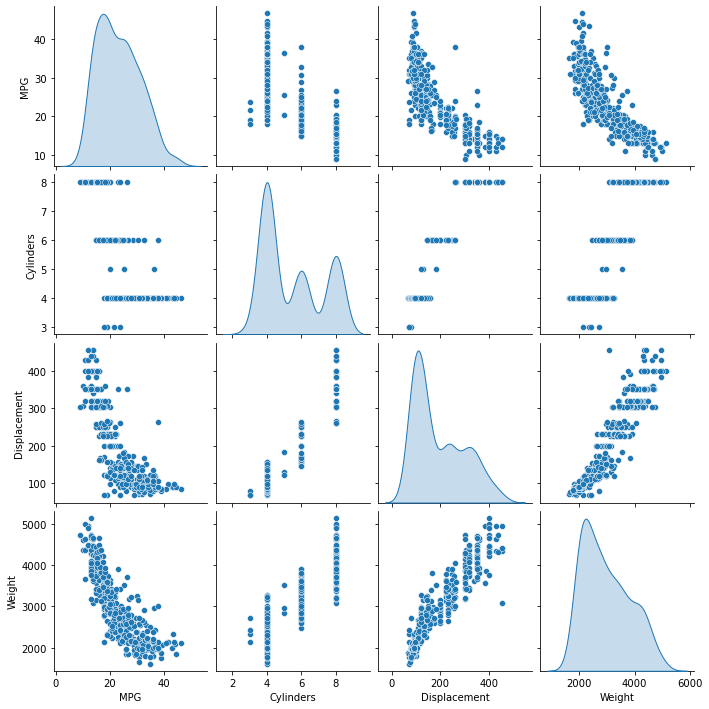

In [143]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [144]:
from sklearn.model_selection import train_test_split

In [149]:
df_data=dataset.drop('MPG', axis=1)
df_target= pd.DataFrame(dataset.MPG, columns=["MPG"])
df_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [150]:
X_train, X_test, y_train, y_test=train_test_split(df_data, df_target, test_size=0.25,random_state=12)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [152]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'

In [142]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'

In [153]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

ValueError: Unknown label type: 'continuous'

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---


ValueError: Unknown label type: 'continuous'

In [155]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train,y_train)

y_pred =regressor.predict(X_test)
print(y_pred)

[[25.96078225]
 [29.02788571]
 [24.75232849]
 [13.74027328]
 [35.7497682 ]
 [30.51313315]
 [23.16386699]
 [29.29151818]
 [30.90200381]
 [29.41596627]
 [15.70347381]
 [20.05519157]
 [22.45922161]
 [20.74778261]
 [10.91445135]
 [27.55343801]
 [32.32919459]
 [31.22317879]
 [11.21087637]
 [25.59030971]
 [29.73020061]
 [12.22028416]
 [23.76151309]
 [32.42285589]
 [28.10152839]
 [24.19647239]
 [28.18686028]
 [16.85734526]
 [20.27614048]
 [10.37218613]
 [22.48649759]
 [26.41333421]
 [18.9830641 ]
 [23.47195009]
 [14.79571404]
 [27.08278317]
 [32.97361518]
 [29.3278272 ]
 [14.12604618]
 [26.30396641]
 [32.7676714 ]
 [24.01953964]
 [33.91596352]
 [32.87546721]
 [25.23792142]
 [27.54184726]
 [31.26782467]
 [22.17026549]
 [15.26695356]
 [24.4301493 ]
 [22.46119567]
 [25.51033092]
 [23.73206401]
 [22.8060389 ]
 [30.66259266]
 [32.21411153]
 [34.49904951]
 [25.2464577 ]
 [33.83784174]
 [35.78787628]
 [21.79519865]
 [13.91217505]
 [20.6003898 ]
 [ 8.83777902]
 [26.62639168]
 [23.05399559]
 [23.35088

ValueError: x and y must be the same size

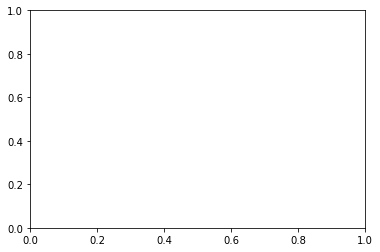

In [156]:
plt.scatter(X_train, y_train)
plt.show()